# Pymaceuticals Inc.
---

### Analysis

- The data has concluded that Capomulin and Ramicane are the drugs that quickly and most effectively treated the tumors in the mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_data = combined_mouse_data['Mouse ID'].unique()
mice_number = len(mice_data)
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data[combined_mouse_data[["Mouse ID", "Timepoint"]].duplicated() ==True]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == duplicate_mice_id[0]]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = clean_mouse_data["Mouse ID"].unique()
number_of_mice = len(clean_data)
number_of_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = clean_mouse_data.set_index(["Drug Regimen"])
groupby_data = drug_regimen.groupby("Drug Regimen")
drug_regimen_mean = groupby_data["Tumor Volume (mm3)"].mean()
drug_regimen_median = groupby_data["Tumor Volume (mm3)"].median()
drug_regimen_var = groupby_data["Tumor Volume (mm3)"].var()
drug_regimen_std = groupby_data["Tumor Volume (mm3)"].std()
drug_regimen_sem = groupby_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean,
                                "Median Tumor Volume": drug_regimen_median,
                                "Tumor Volume variance":drug_regimen_var,
                                "Tumor Volume Std Dev": drug_regimen_std,
                                "Tumor Volume Std Err": drug_regimen_sem})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_regimen.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

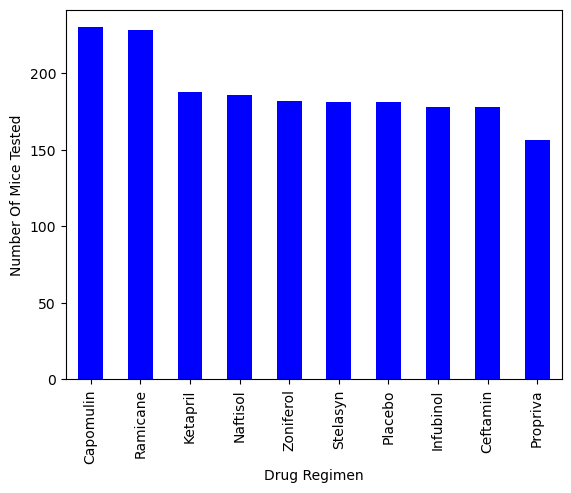

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drugs = clean_mouse_data[['Drug Regimen','Timepoint']]
mice_per_drugs = mice_drugs["Drug Regimen"].value_counts()
mice_per_drugs
mice_per_drugs.plot(kind="bar",color="blue",xlabel="Drug Regimen",ylabel="Number Of Mice Tested")
plt.show()

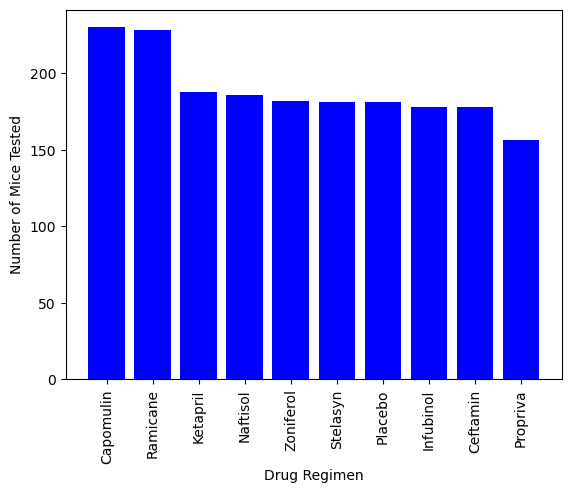

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_drugs = mice_per_drugs.index.values
total_count = mice_per_drugs.values
plt.bar(total_drugs,total_count, color="blue",align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

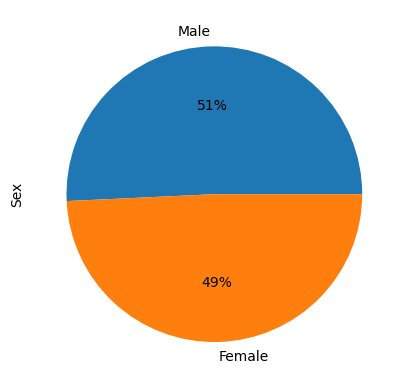

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_mouse_data["Sex"].value_counts()
sex = ["Male","Female"]
male_female.plot(kind = "pie" ,autopct="%1.0f%%", ylabel = "Sex")
plt.show()

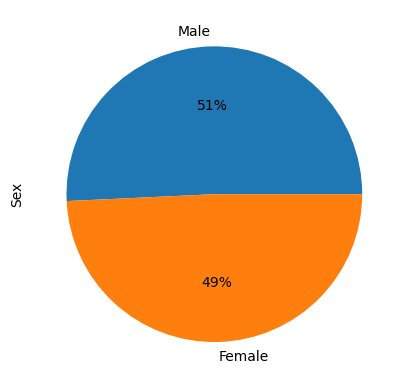

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label_sex = male_female.index.values
count_value = male_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = label_sex, autopct= "%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data_reduced = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]== "Capomulin") | (clean_mouse_data["Drug Regimen"] == "Ramicane") |
                    (clean_mouse_data["Drug Regimen"] == "Infubinol") |(clean_mouse_data["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
last_time_point = drug_data_reduced.groupby(["Drug Regimen", "Mouse ID"]).last()
last_time_point_2 = last_time_point.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_df = last_time_point_2.loc[last_time_point_2["Drug Regimen"]== "Capomulin"]
capomulin_df
ramicane_df = last_time_point_2.loc[last_time_point_2["Drug Regimen"]== "Ramicane"]
ramicane_df
infubinol_df = last_time_point_2.loc[last_time_point_2["Drug Regimen"]== "Infubinol"]
infubinol_df
ceftamin_df = last_time_point_2.loc[last_time_point_2["Drug Regimen"]== "Ceftamin"]
ceftamin_df

df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"], 
                   "Ramicane": ramicane_df["Tumor Volume (mm3)"],
                  "Infubinol": infubinol_df["Tumor Volume (mm3)"],
                  "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})
df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in drug_data_reduced["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upper_quartile = []
lower_quartile = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    quartiles = df[drug].quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    drug_iqr = upper-lower
    # Locate the rows which contain mice on each drug and get the tumor volumes
upper_quartile.append(upper)
lower_quartile.append(lower)
print(f"The lower quartile of treatment is : {lower}")
print(f"The upper quartile of temperature is : {upper}")
print(f"The interquartile range of temperature is : {drug_iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lower - (1.5*drug_iqr)
upper_bound = upper + (1.5*drug_iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile of treatment is : 48.72207785
The upper quartile of temperature is : 64.29983003
The interquartile range of temperature is : 15.577752179999997
The median of temperatures is: 59.85195552
Values below 25.355449580000002 are outliers.
Values above 87.66645829999999 are outliers.


Text(0.5, 1.0, 'Tumor Volume At Selected Mouse')

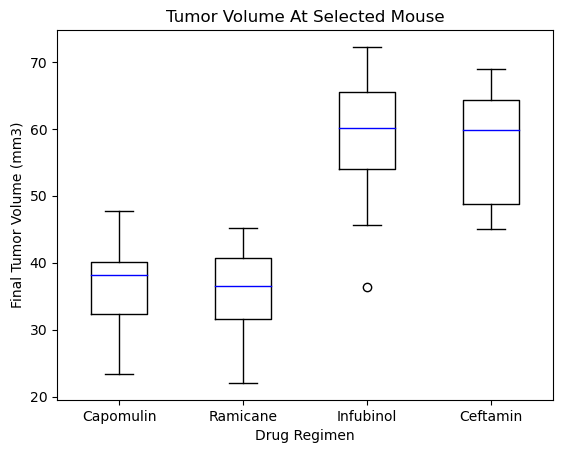

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('Drug Regimen')
boxplot.set_title("Tumor Volume At Selected Mouse")

## Line and Scatter Plots

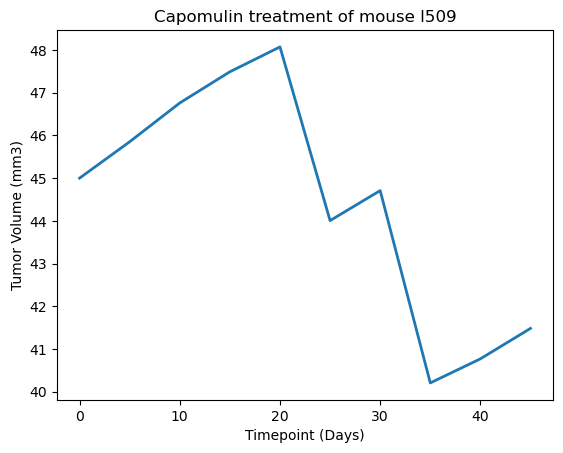

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509" ,:]
x_axis = capomulin_df["Timepoint"]
y_axis = capomulin_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, y_axis, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('linechart')
plt.show()

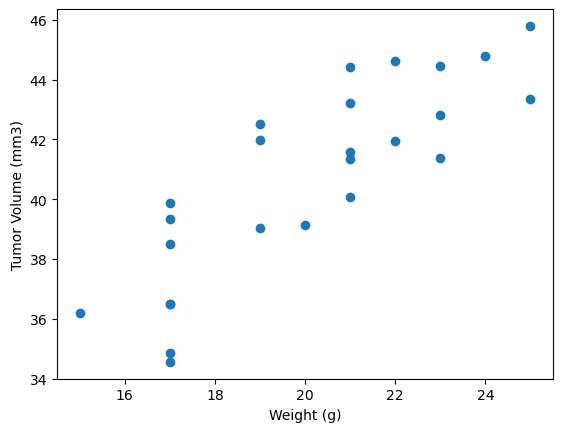

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_new_df = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]== "Capomulin")]
group_capo_df = capomulin_new_df.groupby("Mouse ID")

avg_tumor_vol = group_capo_df[("Tumor Volume (mm3)")].mean()
weight = group_capo_df["Weight (g)"].mean()
avg_capo_df = pd.DataFrame({"Weight (g)": weight, "Tumor Volume (mm3)": avg_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

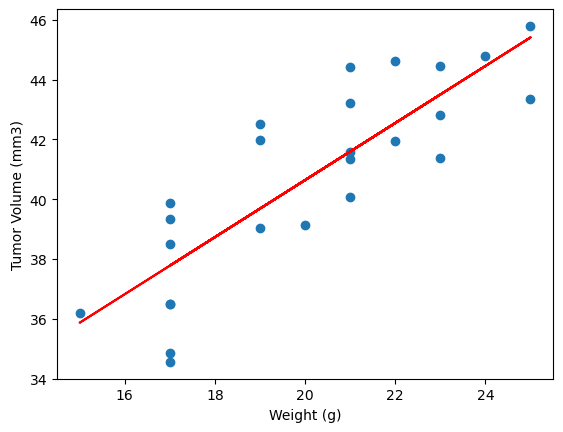

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

y_values = avg_capo_df["Tumor Volume (mm3)"]
x_values = avg_capo_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show